In [1]:
# To check if datasets were processed correctly and work for modeling I will run simple decision tree models.

In [1]:
# EDA packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# ML Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Importing data
df1 = pd.read_csv("data1.csv", skipinitialspace = True, low_memory = False) #dataset after first preprocessing steps - will be used for clustering
df2 = pd.read_csv("data2.csv", skipinitialspace = True, low_memory = False) #dataset after feature engineering
df3 = pd.read_csv("data3.csv", skipinitialspace = True, low_memory = False) #dataset after outliers removal
df4 = pd.read_csv("data4.csv", skipinitialspace = True, low_memory = False) #dataset after scaling

In [4]:
# Independent and dependent variables
X1 = df2.iloc[:, df2.columns != "loan_status"]
y1 = df2.iloc[:, df2.columns == "loan_status"]
X2 = df3.iloc[:, df3.columns != "loan_status"]
y2 = df3.iloc[:, df3.columns == "loan_status"]
X3 = df4.iloc[:, df4.columns != "loan_status"]
y3 = df4.iloc[:, df4.columns == "loan_status"]

In [5]:
# Train test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1 , test_size = 0.3, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , test_size = 0.3, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3 , test_size = 0.3, random_state = 1)

In [6]:
print(X1_train.shape)
print(X2_train.shape)
print(X3_train.shape)

(27850, 111)
(24574, 111)
(24574, 111)


In [7]:
# Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1)
X1_train, y1_train = smote.fit_resample(X1_train, y1_train)
X2_train, y2_train = smote.fit_resample(X2_train, y2_train)
X3_train, y3_train = smote.fit_resample(X3_train, y3_train)

In [9]:
print(X1_train.shape)
print(X2_train.shape)
print(X3_train.shape)

(47814, 111)
(42540, 111)
(42540, 111)


In [7]:
print(y1_train.value_counts())
print(y2_train.value_counts())
print(y3_train.value_counts())

loan_status
0              23907
1              23907
dtype: int64
loan_status
0              21270
1              21270
dtype: int64
loan_status
0              21270
1              21270
dtype: int64


In [10]:
# Running first model on dataset 1
dt_model1 = DecisionTreeClassifier(random_state = 1)
dt_model1.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=1)

In [11]:
print('Feature importances: \n', pd.DataFrame(sorted(dt_model1.feature_importances_, reverse = True), columns = ['Imp'], index = X1_train.columns))

Feature importances: 
                                Imp
loan_amnt                 0.119939
term                      0.116341
int_rate                  0.099887
annual_inc                0.093477
dti                       0.088497
delinq_2yrs               0.059274
inq_last_6mths            0.030389
open_acc                  0.029527
pub_rec                   0.027748
revol_bal                 0.025707
revol_util                0.024502
total_acc                 0.023999
pub_rec_bankruptcies      0.022488
missing_emp_length        0.021451
emp_length_numerical      0.021225
emp_us_army               0.020265
loan_desc                 0.015397
issue_d_earliest_cr_line  0.014870
loan_to_income            0.010058
fico_range_average        0.009929
A                         0.008703
B                         0.008139
C                         0.008107
D                         0.007204
E                         0.005322
F                         0.005113
G                         0.0047

In [12]:
# Check model's accuracy
y1_pred = dt_model1.predict(X1_test)
acc_DT1 = metrics.accuracy_score(y1_test, y1_pred)
print("Accuracy: ", acc_DT1)
print(confusion_matrix(y1_test, y1_pred))

Accuracy:  0.7591320375335121
[[ 407 1320]
 [1555 8654]]


In [13]:
# Inputting results of models into dataframe.
results = pd.DataFrame({"Method":["Decision Tree df1"], "accuracy": acc_DT1},index = {"1"})
results = results[["Method", "accuracy"]]
results

,Method,accuracy
1,Decision Tree df1,0.759132


In [14]:
# Running first model on dataset 2
dt_model2 = DecisionTreeClassifier(random_state = 1)
dt_model2.fit(X2_train , y2_train)

DecisionTreeClassifier(random_state=1)

In [15]:
print('Feature importances: \n', pd.DataFrame(sorted(dt_model2.feature_importances_, reverse = True), columns = ['Imp'], index = X2_train.columns))

Feature importances: 
                                Imp
loan_amnt                 0.128295
term                      0.120644
int_rate                  0.101699
annual_inc                0.088268
dti                       0.086993
delinq_2yrs               0.055693
inq_last_6mths            0.034605
open_acc                  0.029751
pub_rec                   0.028936
revol_bal                 0.027429
revol_util                0.026206
total_acc                 0.024768
pub_rec_bankruptcies      0.021668
missing_emp_length        0.019737
emp_length_numerical      0.019713
emp_us_army               0.017600
loan_desc                 0.016717
issue_d_earliest_cr_line  0.016547
loan_to_income            0.014471
fico_range_average        0.012267
A                         0.010417
B                         0.007916
C                         0.004840
D                         0.004765
E                         0.004589
F                         0.004001
G                         0.0035

In [16]:
# Check model's accuracy
y2_pred = dt_model2.predict(X2_test)
acc_DT2 = metrics.accuracy_score(y2_test, y2_pred)
print("Accuracy: ", acc_DT2)
print(confusion_matrix(y2_test, y2_pred))

Accuracy:  0.7635051742143739
[[ 320 1146]
 [1345 7722]]


In [17]:
# Inputting results of models into dataframe.
tempResultsDf = pd.DataFrame({"Method":["Decision Tree df2"], "accuracy": acc_DT2},index = {"2"})
results = pd.concat([results, tempResultsDf])
results = results[["Method", "accuracy"]]
results

,Method,accuracy
1,Decision Tree df1,0.759132
2,Decision Tree df2,0.763505


In [18]:
# Running first model on dataset 3
dt_model3 = DecisionTreeClassifier(random_state = 1)
dt_model3.fit(X3_train , y3_train)

DecisionTreeClassifier(random_state=1)

In [19]:
print('Feature importances: \n', pd.DataFrame(sorted(dt_model3.feature_importances_, reverse = True), columns = ['Imp'], index = X3_train.columns))

Feature importances: 
                                Imp
loan_amnt                 0.119484
int_rate                  0.100749
annual_inc                0.091966
dti                       0.090496
delinq_2yrs               0.075256
inq_last_6mths            0.053876
open_acc                  0.043878
pub_rec                   0.028731
revol_bal                 0.028237
revol_util                0.028005
total_acc                 0.025054
pub_rec_bankruptcies      0.024835
emp_length_numerical      0.024034
loan_to_income            0.022713
fico_range_average        0.020346
term                      0.020106
missing_emp_length        0.019225
emp_us_army               0.017380
loan_desc                 0.016023
issue_d_earliest_cr_line  0.014171
A                         0.012259
B                         0.012176
C                         0.009864
D                         0.008632
E                         0.005204
F                         0.004732
G                         0.0046

In [20]:
# Check model's accuracy
y3_pred = dt_model3.predict(X3_test)
acc_DT3 = metrics.accuracy_score(y3_test, y3_pred)
print("Accuracy: ", acc_DT3)
print(confusion_matrix(y3_test, y3_pred))

Accuracy:  0.7586632488369885
[[ 345 1121]
 [1421 7646]]


In [21]:
# Inputting results of models into dataframe.
tempResultsDf = pd.DataFrame({"Method":["Decision Tree df3"], "accuracy": acc_DT3},index = {"3"})
results = pd.concat([results, tempResultsDf])
results = results[["Method", "accuracy"]]
results

,Method,accuracy
1,Decision Tree df1,0.759132
2,Decision Tree df2,0.763505
3,Decision Tree df3,0.758663


In [22]:
# Running model on dataset 4 only with important features.
# Importance of other features is however lower because they are dummy variables.
X4 = df4[["loan_amnt", "int_rate","annual_inc","dti","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","pub_rec_bankruptcies", "emp_length_numerical", "loan_to_income", "fico_range_average"]]
y4 = df4.iloc[:, df4.columns == "loan_status"]

In [23]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4 , y4, test_size = 0.3, random_state = 1)

In [24]:
X4_train, y4_train = smote.fit_resample(X4_train, y4_train)

In [28]:
dt_model4 = DecisionTreeClassifier(random_state = 1)
dt_model4.fit(X4_train , y4_train)

DecisionTreeClassifier(random_state=1)

In [29]:
print('Feature importances: \n', pd.DataFrame(sorted(dt_model4.feature_importances_, reverse = True), columns = ['Imp'], index = X4_train.columns))

Feature importances: 
                            Imp
loan_amnt             0.255061
int_rate              0.207327
annual_inc            0.113707
dti                   0.063666
delinq_2yrs           0.058032
inq_last_6mths        0.055126
open_acc              0.050510
pub_rec               0.050498
revol_bal             0.047723
revol_util            0.046518
total_acc             0.038031
pub_rec_bankruptcies  0.008415
emp_length_numerical  0.005387
loan_to_income        0.000000
fico_range_average    0.000000


In [30]:
# Check model's accuracy
y4_pred = dt_model4.predict(X4_test)
acc_DT4 = metrics.accuracy_score(y4_test, y4_pred)
print("Accuracy: ", acc_DT4)
print(confusion_matrix(y4_test, y4_pred))

Accuracy:  0.7413842210196525
[[ 299 1167]
 [1557 7510]]


In [31]:
# Inputting results of models into dataframe.
tempResultsDf = pd.DataFrame({"Method":["Decision Tree df4"], "accuracy": acc_DT4},index = {"4"})
results = pd.concat([results, tempResultsDf])
results = results[["Method", "accuracy"]]
results

,Method,accuracy
1,Decision Tree df1,0.759132
2,Decision Tree df2,0.763505
3,Decision Tree df3,0.758663
4,Decision Tree df4,0.741384


In [32]:
# Dataset with not scaled numerical variables has better accuracy than dataset after scaling.
# The differences are however very small.
# Performing modelling on dataset only with important features also leads to lower accuracy score.

## Część 4 - Modelowanie

In [33]:
# Clustering - K-Means, Hierarchical Clustering, DBScan
# For clustering I am going to use dataset 2 (after feature engineering and creating dummies, before removing outliers and standardization)

In [34]:
# K-Means clustering
cluster_range = [2, 3, 4, 5, 6, 7, 8]  
cluster_errors = []
ssd = []
for num_clusters in cluster_range:
    kmeans = KMeans(num_clusters, n_init = 5)
    kmeans.fit(df2)
    labels = kmeans.labels_
    cluster_errors.append(kmeans.inertia_)
    ssd.append(kmeans.inertia_)

In [35]:
# Checking cluster errors dataframe.
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,2,1.249095e+14
1,3,7.906708e+13
2,4,4.912209e+13
3,5,3.577098e+13
4,6,2.894892e+13
5,7,2.390250e+13
6,8,2.072321e+13


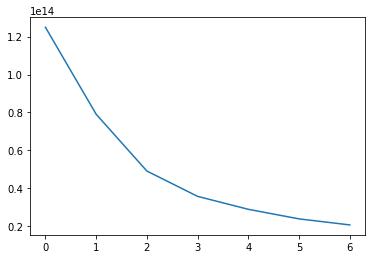

In [36]:
# Plotting elbow-curve - sum of squared distances for each number of clusters.
import matplotlib.pyplot as plt
plt.plot(ssd)

In [37]:
# Checking silhouette scores.
for num_clusters in cluster_range:
    kmeans = KMeans(num_clusters, n_init = 5)
    kmeans.fit(df2)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df2, labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.943958942010563
For n_clusters=3, the silhouette score is 0.6362428888255125
For n_clusters=4, the silhouette score is 0.5756094431863394
For n_clusters=5, the silhouette score is 0.48508429745530685
For n_clusters=6, the silhouette score is 0.42434558325169075
For n_clusters=7, the silhouette score is 0.4062511232275385
For n_clusters=8, the silhouette score is 0.36357358735837364


In [64]:
# Based on elbow-curve and silhouette score I decided to divide data into 2 clusters.
kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 1)
kmeans.fit(df2)

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=2, random_state=1)

In [65]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [66]:
df2["k_means_cluster_id"] = kmeans.labels_

In [67]:
# Clusters are not well balanced. Cluster 1 has only 80 observations whereas cluster 0 has 39706.
df2.k_means_cluster_id.value_counts()

0    39706
1       80
Name: k_means_cluster_id, dtype: int64

<AxesSubplot:xlabel='k_means_cluster_id', ylabel='fico_range_average'>

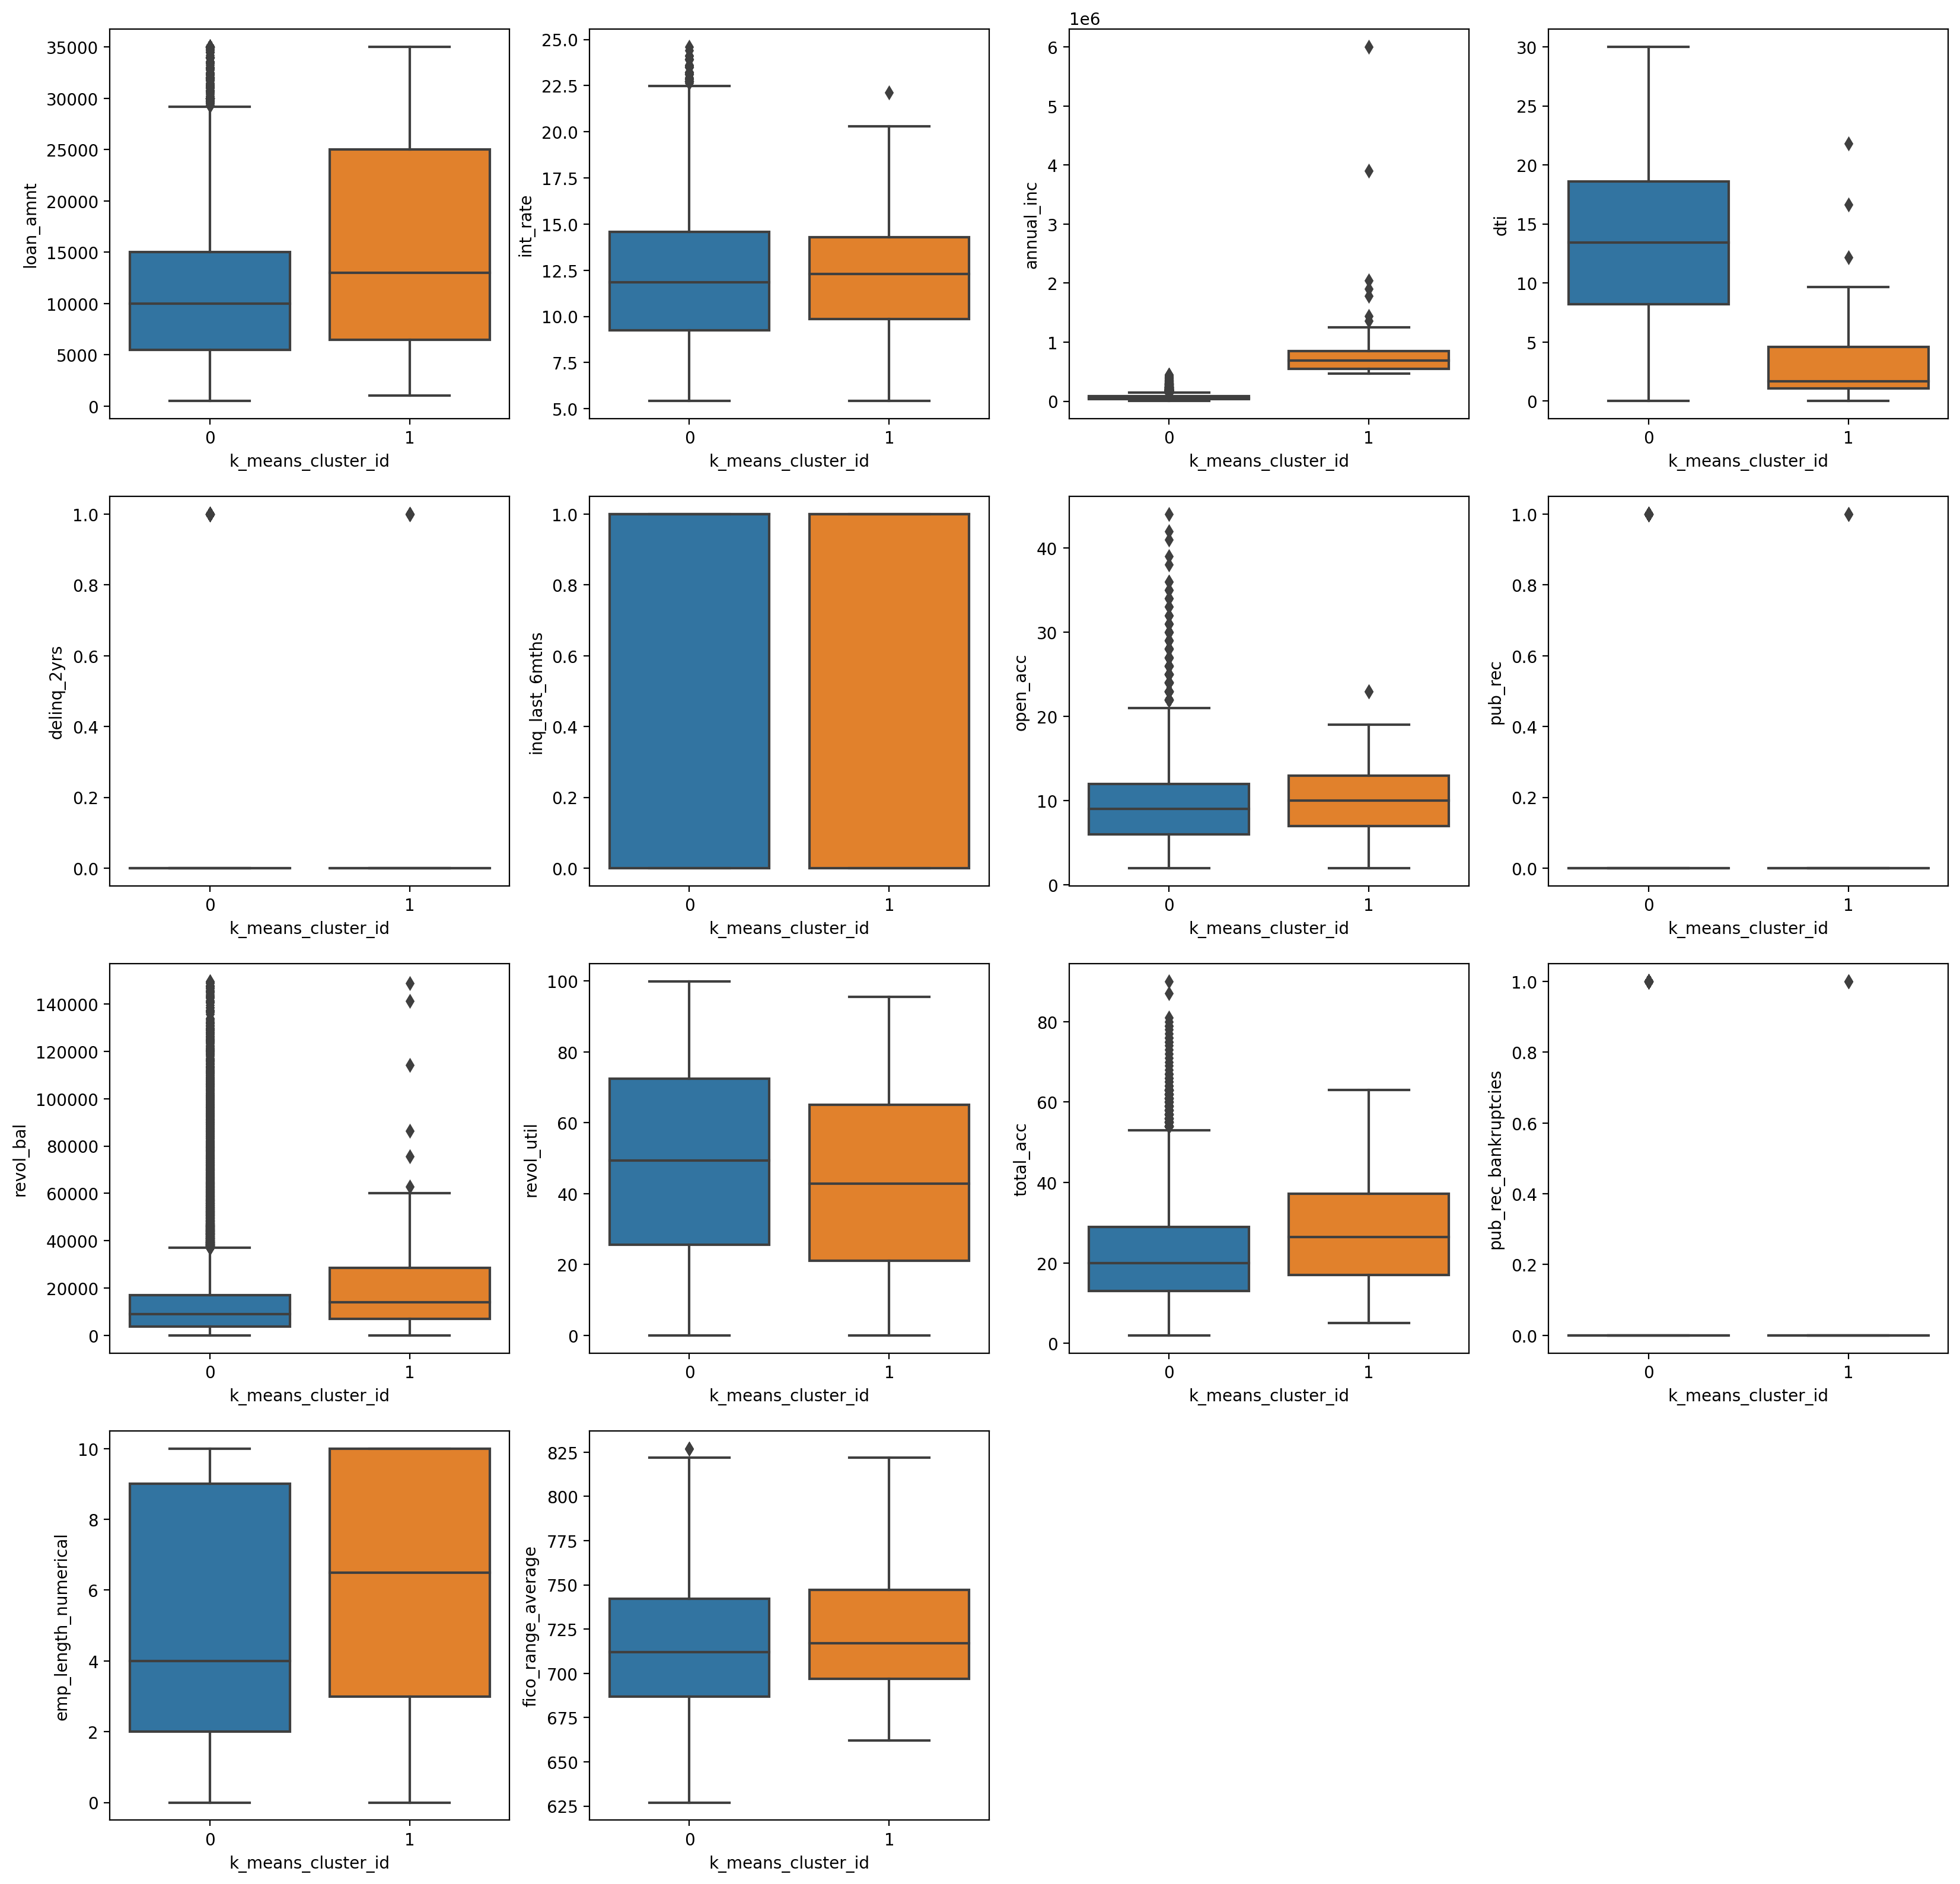

In [68]:
# I will check the differences between clusters based on numerical features that I can plot boxplots for.

import seaborn as sns

plt.figure(figsize = (20,20), dpi = 200)

plt.subplot(4,4,1)
sns.boxplot(x = "k_means_cluster_id", y = "loan_amnt", data = df2)

plt.subplot(4,4,2)
sns.boxplot(x = "k_means_cluster_id", y = "int_rate", data = df2)

plt.subplot(4,4,3)
sns.boxplot(x = "k_means_cluster_id", y = "annual_inc", data = df2)

plt.subplot(4,4,4)
sns.boxplot(x = "k_means_cluster_id", y = "dti", data = df2)

plt.subplot(4,4,5)
sns.boxplot(x = "k_means_cluster_id", y = "delinq_2yrs", data = df2)

plt.subplot(4,4,6)
sns.boxplot(x = "k_means_cluster_id", y = "inq_last_6mths", data = df2)

plt.subplot(4,4,7)
sns.boxplot(x = "k_means_cluster_id", y = "open_acc", data = df2)

plt.subplot(4,4,8)
sns.boxplot(x = "k_means_cluster_id", y = "pub_rec", data = df2)

plt.subplot(4,4,9)
sns.boxplot(x = "k_means_cluster_id", y = "revol_bal", data = df2)

plt.subplot(4,4,10)
sns.boxplot(x = "k_means_cluster_id", y = "revol_util", data = df2)

plt.subplot(4,4,11)
sns.boxplot(x = "k_means_cluster_id", y = "total_acc", data = df2)

plt.subplot(4,4,12)
sns.boxplot(x = "k_means_cluster_id", y = "pub_rec_bankruptcies", data = df2)

plt.subplot(4,4,13)
sns.boxplot(x = "k_means_cluster_id", y = "emp_length_numerical", data = df2)

plt.subplot(4,4,14)
sns.boxplot(x = "k_means_cluster_id", y = "fico_range_average", data = df2)

In [69]:
# Observations classified in cluster 0 have higher values of dti, revol_util features.
# Observations classified in cluster 1 have higher values of loan_amnt, int_rate, annual_inc, open_acc, revol_bal, total_acc, emp_length_numerical and fico_range_average features.
# From the above plots it is hard to say which cluster contains higher ratio of fully paid to charged off loans.

<AxesSubplot:xlabel='k_means_cluster_id', ylabel='count'>

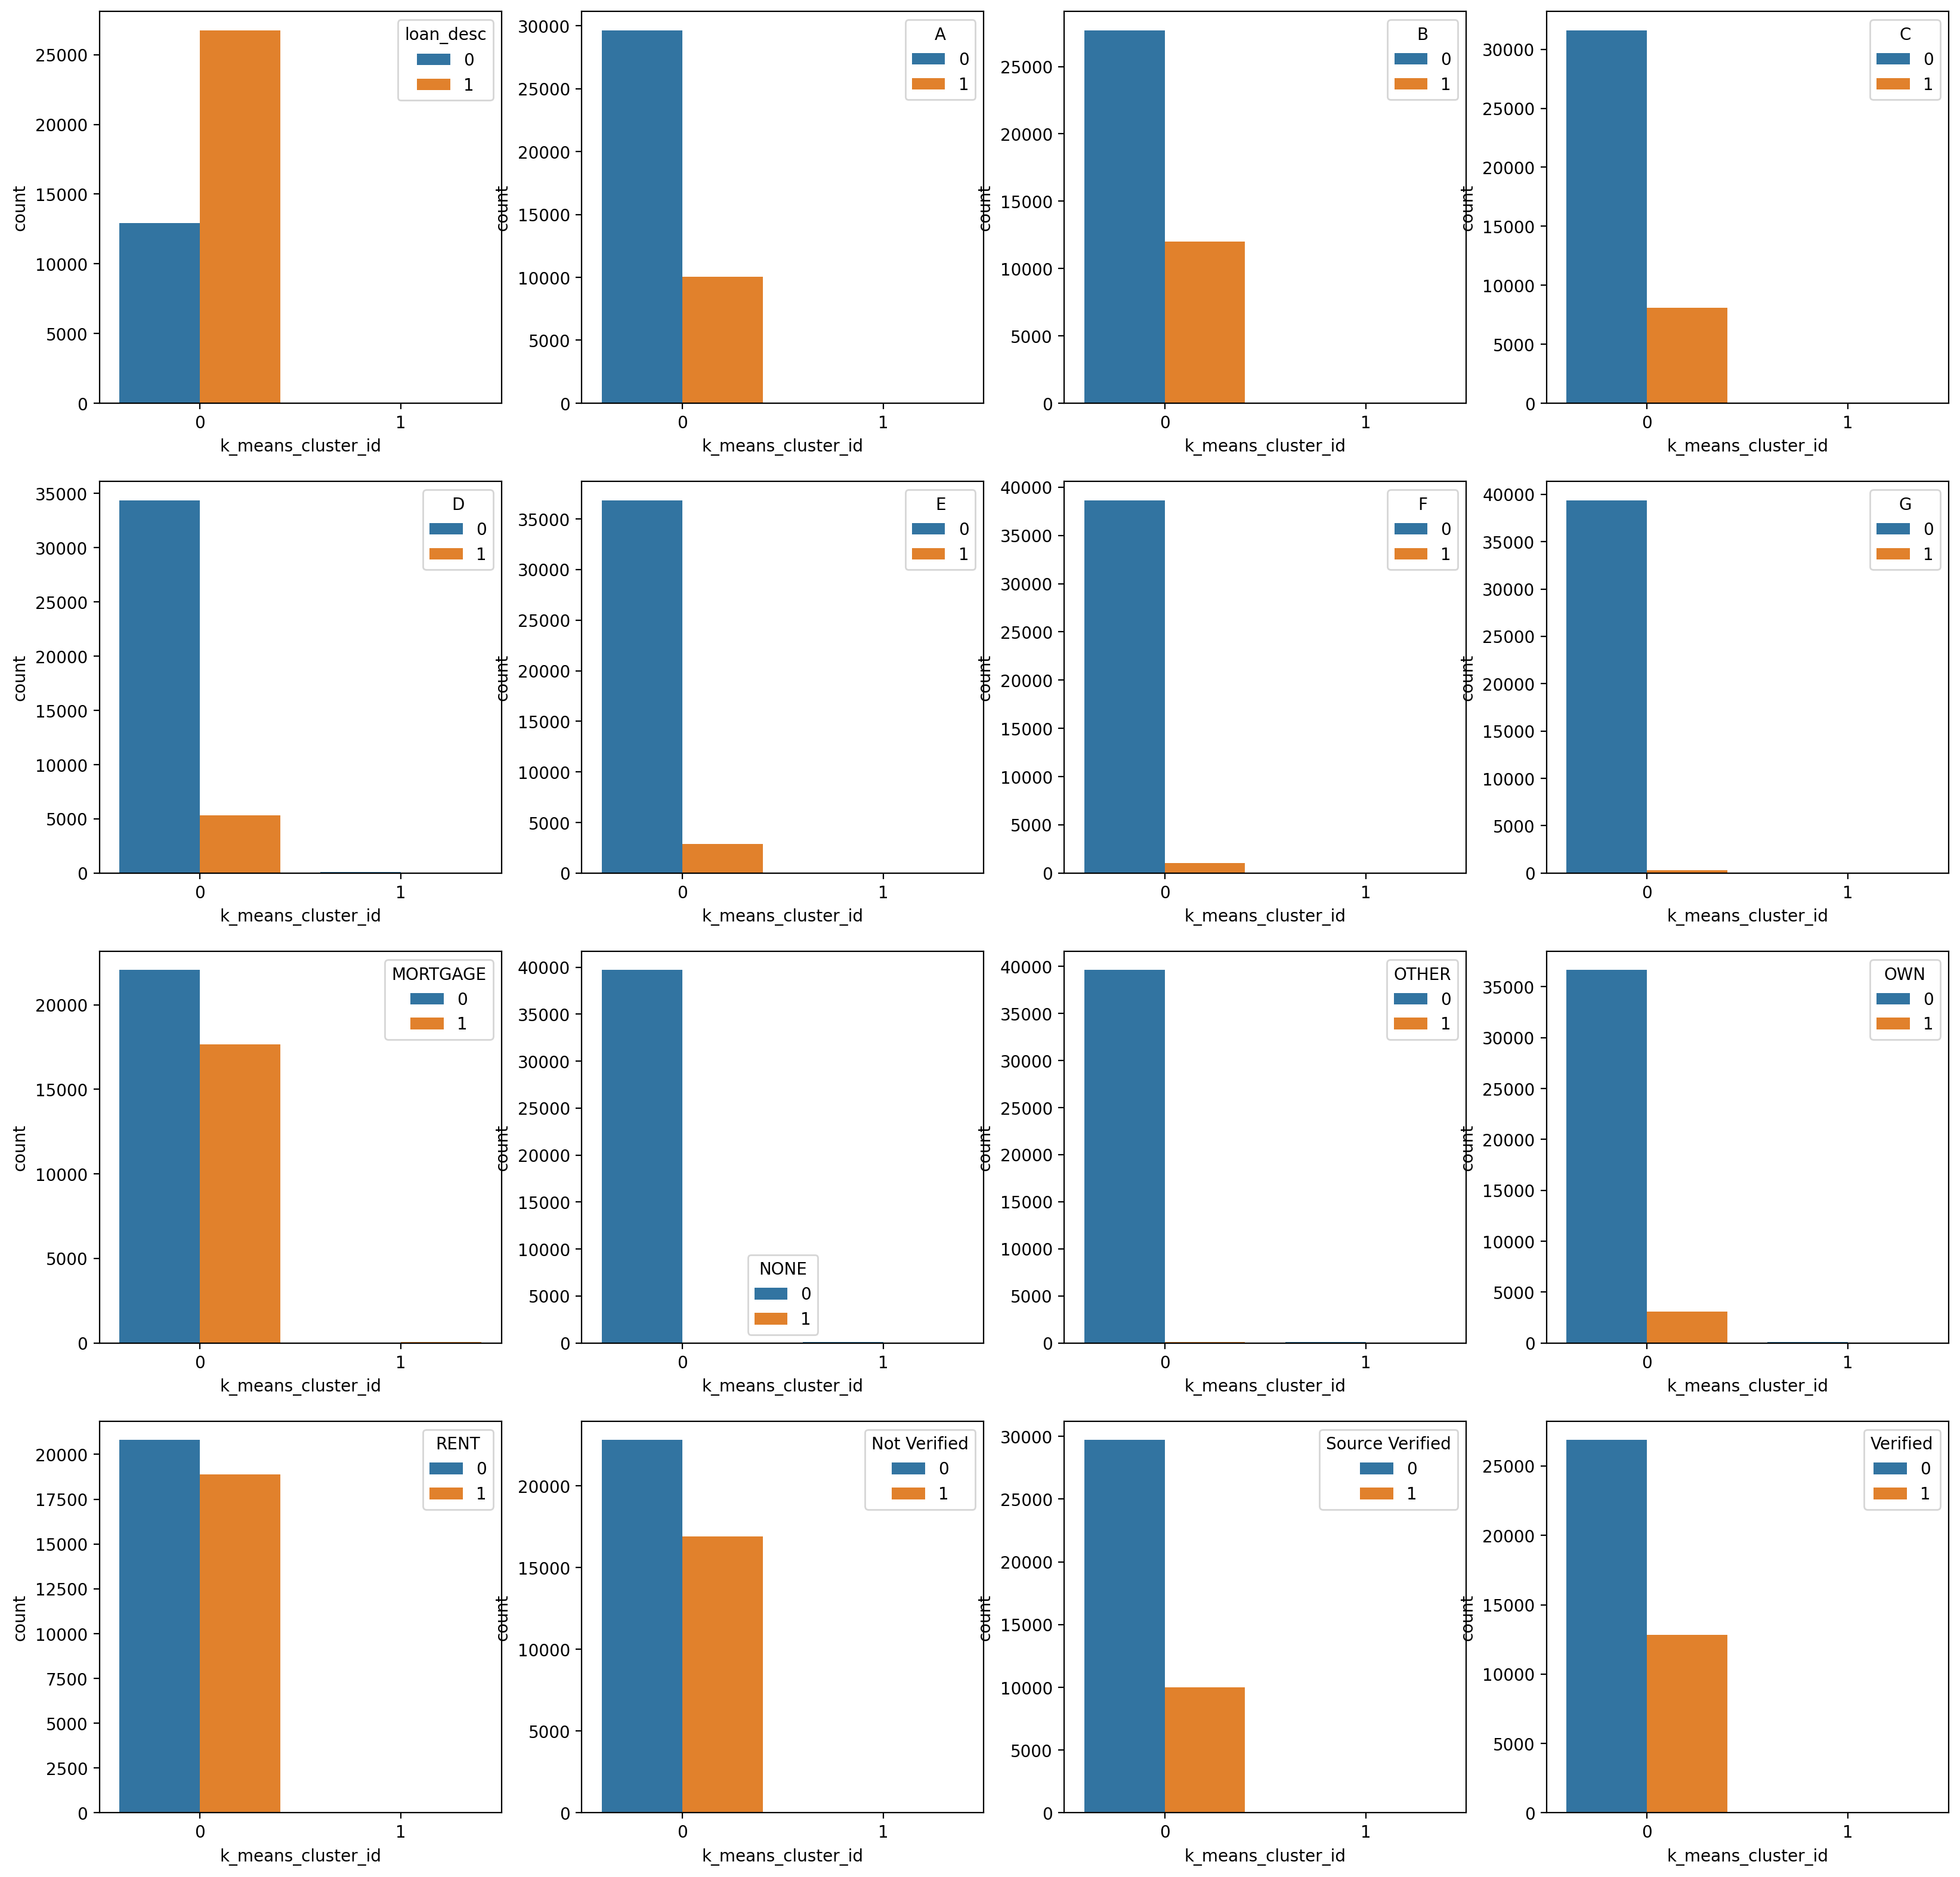

In [70]:
# I will also check the differences between clusters based on some categorical features.

plt.figure(figsize = (20,20), dpi = 200)

plt.subplot(4,4,1)
sns.countplot(x = "k_means_cluster_id", hue = "loan_desc", data = df2)

plt.subplot(4,4,2)
sns.countplot(x = "k_means_cluster_id", hue = "A", data = df2)

plt.subplot(4,4,3)
sns.countplot(x = "k_means_cluster_id", hue = "B", data = df2)

plt.subplot(4,4,4)
sns.countplot(x = "k_means_cluster_id", hue = "C", data = df2)

plt.subplot(4,4,5)
sns.countplot(x = "k_means_cluster_id", hue = "D", data = df2)

plt.subplot(4,4,6)
sns.countplot(x = "k_means_cluster_id", hue = "E", data = df2)

plt.subplot(4,4,7)
sns.countplot(x = "k_means_cluster_id", hue = "F", data = df2)

plt.subplot(4,4,8)
sns.countplot(x = "k_means_cluster_id", hue = "G", data = df2)

plt.subplot(4,4,9)
sns.countplot(x = "k_means_cluster_id", hue = "MORTGAGE", data = df2)

plt.subplot(4,4,10)
sns.countplot(x = "k_means_cluster_id", hue = "NONE", data = df2)

plt.subplot(4,4,11)
sns.countplot(x = "k_means_cluster_id", hue = "OTHER", data = df2)

plt.subplot(4,4,12)
sns.countplot(x = "k_means_cluster_id", hue = "OWN", data = df2)

plt.subplot(4,4,13)
sns.countplot(x = "k_means_cluster_id", hue = "RENT", data = df2)

plt.subplot(4,4,14)
sns.countplot(x = "k_means_cluster_id", hue = "Not Verified", data = df2)

plt.subplot(4,4,15)
sns.countplot(x = "k_means_cluster_id", hue = "Source Verified", data = df2)

plt.subplot(4,4,16)
sns.countplot(x = "k_means_cluster_id", hue = "Verified", data = df2)

In [71]:
# As clusters are not balanced it is hard to understand the graphs.
# What is more, drawing conclusions from that imbalanced clusters can lead to wrong understanding.

<AxesSubplot:xlabel='k_means_cluster_id', ylabel='count'>

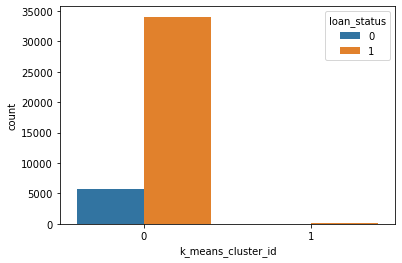

In [72]:
# Checking loan status in different clusters.
sns.countplot(x = "k_means_cluster_id", hue = "loan_status", data = df2)

In [73]:
for k_means_cluster_id in sorted(df2.k_means_cluster_id.unique()):
    print(k_means_cluster_id)
    print(df2[df2.k_means_cluster_id == k_means_cluster_id].loan_status.value_counts(normalize = True))

0
1    0.857503
0    0.142497
Name: loan_status, dtype: float64
1
1    0.85
0    0.15
Name: loan_status, dtype: float64


In [74]:
# It turns out that there loans in cluster 0 and 1 are not different when it comes to their status.
# It does not make sense to include KMeans cluster label in the dataset.
df2.drop("k_means_cluster_id", axis = 1, inplace = True)

In [75]:
# Hierarchical Clustering
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(20000)

3000


In [77]:
# Hierarchical Clustering - single method
sl_mergings = linkage(df2, method = "single", metric = "euclidean")
plt.figure(figsize = (20,20), dpi = 200)
dendrogram(sl_mergings)
plt.savefig("dendrogram1.png")

In [ ]:
# Hierarchical Clustering - complete method
cl_mergings = linkage(df2, method = "complete", metric = "euclidean")
plt.figure(figsize = (20,20), dpi = 200)
dendrogram(cl_mergings)
plt.savefig("dendrogram2.png")

In [ ]:
# Agglomerative Hierarchical Clustering
agglomerative_model = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "complete")
agglomerative_model.fit(df2)
data_labels = agglomerative_model.labels_

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "loan_amnt", 
                y = "int_rate", 
                data = df2, 
                alpha = 0.5,
                hue = data_labels).set_title("Labeled Loans")

In [ ]:
# Dendrograms created with single and complete methods are both difficult to read.
# I decided to add to dataset labels of clusters created in clustering performed with both single and complete method for further analysis.
# Looking at the dendrograms it is difficult to decide on the number of clusters. However, I decided to choose 2 clusters.
# I also performed agglomerative clustering with 2 clusters (as number of clusters has to be determined).
# It seems however that most of the observations were classified to cluster 1 (clusters are imbalanced - similarly to clusters created with KMeans).
# Therefore, I will use this clustering method for further analysis.

In [ ]:
df2["cl_hierarchical_cluster_labels"] = cut_tree(cl_mergings, n_clusters = 2).reshape(-1, )
df2["sl_hierarchical_cluster_labels"] = cut_tree(sl_mergings, n_clusters = 2).reshape(-1, )

In [ ]:
# Clusters ctreated with complete method are not balanced.
df2.cl_hierarchical_cluster_labels.value_counts()

In [ ]:
# Clusters created with single method are also not balanced.
df2.sl_hierarchical_cluster_labels.value_counts()

In [ ]:
# Based on the imbalance of clusters I decided to not include information about it in further analysis and drop columns with their numbers.
df2.drop("cl_hierarchical_cluster_labels", axis = 1, inplace = True)
df2.drop("sl_hierarchical_cluster_labels", axis = 1, inplace = True)

In [96]:
# DBSCAN
dbscan = DBSCAN(eps = 0.5, metric = "euclidean", n_jobs = -1)
dbscan.fit(df2)

DBSCAN(eps=0.01, n_jobs=-1)

In [97]:
labels = dbscan.labels_

In [98]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 39786


In [80]:
df2["dbscan_cluster_labels"] = dbscan.labels_ 

In [81]:
# DBSCAN I ran with the above parameters did not identify the need to divide the observations into clusters.
# All observations were classified as noise points.
# I will try to find better parameters for this dataset.
df2.dbscan_cluster_labels.value_counts()

-1    39786
Name: dbscan_cluster_labels, dtype: int64

In [84]:
from sklearn.neighbors import NearestNeighbors

In [85]:
neighbors = NearestNeighbors(n_neighbors = 20)
neighbors_fit = neighbors.fit(df2)
distances, indices = neighbors_fit.kneighbors(df2)

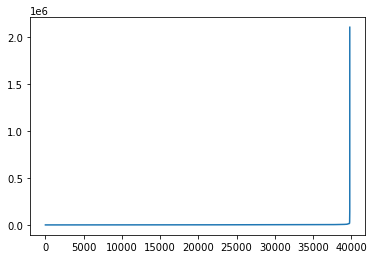

In [86]:
distances = np.sort(distances, axis = 0)
distances = distances[:,1]
plt.plot(distances)

In [99]:
# Based on the plot, best values of eps and min_samples would be 0 ans 39000 respectively.
# Setting parameters like that however would lead to 0 cluster being created (as above).
# I ran DBSCAN with different values of epsilon starting from 0.1 to 10 and every time all observations where classified as noise.
# According to DBSCAN it is not worth clustering this dataset.

In [100]:
# Similarly to other clustering methods, I decided to not include information about it in further analysis and drop column with cluster numbers.
df2.drop("dbscan_cluster_labels", axis = 1, inplace = True)

In [9]:
# Now I will train different models.
def evaluate(prediction, y_test, proba): 
    auroc = roc_auc_score(y_test, proba)
    conf_matrix = confusion_matrix(y_test, prediction)
    performance_data = {"AUROC":round(auroc, 4),
                        "Confusion Matrix":conf_matrix}
    return performance_data

In [8]:
# Logistic regression
lr = LogisticRegression(random_state = 1, max_iter = 1000)
lr.fit(X3_train, np.ravel(y3_train))
lr_pred = lr.predict(X3_test)
lr_proba = lr.predict_proba(X3_test)[:, 1]
lr_pr = evaluate(lr_pred, y3_test, lr_proba)
lr_pr

KeyboardInterrupt: 

In [10]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)

In [123]:
# Logistic regression + CV
lr2 = LogisticRegression(random_state = 1, max_iter = 10000)
lr2_cv = GridSearchCV(lr2, {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}, cv = kf)
lr2_cv.fit(X3_train, np.ravel(y3_train))
print(lr2_cv.best_params_)
lr2_cv_pred = lr2_cv.predict(X3_test)
lr2_cv_proba = lr2_cv.predict_proba(X3_test)[:, 1]
lr2_cv_pr = evaluate(lr2_cv_pred, y3_test, lr2_cv_proba)
lr2_cv_pr

{'C': 10}


{'AUROC': 0.6748,
 'Confusion Matrix': array([[  42, 1424],
        [ 104, 8963]])}

In [124]:
# Logistic regression + l1 regularization + CV
lr3 = LogisticRegression(solver = "liblinear", penalty = "l1", random_state = 1, max_iter = 10000)
lr3_cv = GridSearchCV(lr3, {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}, cv = kf)
lr3_cv.fit(X3_train, np.ravel(y3_train))
print(lr3_cv.best_params_)
lr3_cv_pred = lr3_cv.predict(X3_test)
lr3_cv_proba = lr3_cv.predict_proba(X3_test)[:, 1]
lr3_cv_pr = evaluate(lr3_cv_pred, y3_test, lr3_cv_proba)
lr3_cv_pr

{'C': 10}


{'AUROC': 0.688,
 'Confusion Matrix': array([[  18, 1448],
        [  28, 9039]])}

In [125]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state = 1)
dtree.fit(X3_train, y3_train)
dtree_pred = dtree.predict(X3_test)
dtree_proba = dtree.predict_proba(X3_test)[:, 1]
dtree_pr = evaluate(dtree_pred, y3_test, dtree_proba)
dtree_pr

{'AUROC': 0.5393,
 'Confusion Matrix': array([[ 345, 1121],
        [1421, 7646]])}

In [126]:
# Decision Tree + RandomizedSearchCV
param_rand = {"min_samples_leaf": [1, 2, 4],
              "min_samples_split": [2, 5, 10],
              "max_depth" : np.arange(10, 100, 10)}
dt_random = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 1), param_distributions = param_rand, n_iter = 100,
                               cv = kf, random_state = 1, n_jobs = -1)
dt_random.fit(X3_train, y3_train)
print(dt_random.best_params_)
dt_random_pred = dt_random.predict(X3_test)
dt_random_proba = dt_random.predict_proba(X3_test)[:, 1]
dt_random_pr = evaluate(dt_random_pred, y3_test, dt_random_proba)
dt_random_pr

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


{'AUROC': 0.6156,
 'Confusion Matrix': array([[ 152, 1314],
        [ 551, 8516]])}

In [128]:
# Decision Tree + GridSearchCV
param_grid = {"min_samples_leaf": [1, 2, 4],
              "min_samples_split": [2, 5, 10],
              "max_depth" : np.arange(10, 100, 10)}
dt_cv = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 1), param_grid = param_grid, cv = kf, n_jobs = -1)
dt_cv.fit(X3_train, y3_train)
print(dt_cv.best_params_)
dt_cv_pred = dt_cv.predict(X3_test)
dt_cv_proba = dt_cv.predict_proba(X3_test)[:, 1]
dt_cv_pr = evaluate(dt_cv_pred, y3_test, dt_cv_proba)
dt_cv_pr

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


{'AUROC': 0.6156,
 'Confusion Matrix': array([[ 152, 1314],
        [ 551, 8516]])}

In [130]:
# Decision Tree + BC
dtree_bc = BaggingClassifier(DecisionTreeClassifier(random_state = 1), random_state = 1)
dtree_bc.fit(X3_train, np.ravel(y3_train))
dtree_bc_pred = dtree_bc.predict(X3_test)
dtree_bc_proba = dtree_bc.predict_proba(X3_test)[:, 1]
dtree_bc_pr = evaluate(dtree_bc_pred, y3_test, dtree_bc_proba)
dtree_bc_pr

{'AUROC': 0.6153,
 'Confusion Matrix': array([[ 168, 1298],
        [ 588, 8479]])}

In [131]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X3_train, np.ravel(y3_train))
rf_pred = rf.predict(X3_test)
rf_proba = rf.predict_proba(X3_test)[:, 1]
rf_pr = evaluate(rf_pred, y3_test, rf_proba)
rf_pr

{'AUROC': 0.659,
 'Confusion Matrix': array([[  31, 1435],
        [  54, 9013]])}

In [132]:
# Random Forest + RandomizedSearchCV
param_rand = {"n_estimators": np.arange(100,800,100),
              "min_samples_leaf": [1,2,4],
              "min_samples_split": [2, 5, 10],
              "max_depth": np.arange(10,100,10)}
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), param_distributions = param_rand, n_iter = 100,
                               cv = kf, random_state = 1, n_jobs = -1)
rf_random.fit(X3_train, np.ravel(y3_train))
print(rf_random.best_params_)
rf_random_pred = rf_random.predict(X3_test)
rf_random_proba = rf_random.predict_proba(X3_test)[:, 1]
rf_random_pr = evaluate(rf_random_pred, y3_test, rf_random_proba)
rf_random_pr

{'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


{'AUROC': 0.6691,
 'Confusion Matrix': array([[  18, 1448],
        [  36, 9031]])}

In [134]:
# SVC rbf + GridSearchCV - taking too long, won't run CV on it
# param_grid = {"gamma": [0.0001, 0.01, 1, 100], "C":[0.1, 10, 1000]}
# svc1 = SVC(random_state = 1)
# svc1_cv = GridSearchCV(svc1, param_grid, n_jobs = -1)
# svc1_cv.fit(X3_train, np.ravel(y3_train))
# print(svc1_cv.best_params_)
# svc1_cv_pred = svc1_cv.predict(X3_test)
# svc1_cv_proba = svc1_cv.predict_proba(X3_test)[:, 1]
# svc1_cv_pr = evaluate(svc1_cv_pred, y3_test, svc1_cv_proba)
# svc1_cv_pr

In [137]:
# SVC rbf
svc1 = SVC(random_state = 1, probability = True)
svc1.fit(X3_train, np.ravel(y3_train))
svc1_pred = svc1.predict(X3_test)
svc1_proba = svc1.predict_proba(X3_test)[:, 1]
svc1_pr = evaluate(svc1_pred, y3_test, svc1_proba)
svc1_pr

{'AUROC': 0.519,
 'Confusion Matrix': array([[ 738,  728],
        [4293, 4774]])}

In [138]:
# SVC linear + GridSearchCV - taking too long, won't run CV on it
# param_grid = {"gamma": [0.0001, 0.01, 1, 100], "C":[0.1, 10, 1000]}
# svc2 = SVC(kernel = "linear", random_state = 1, probability = True)
# svc2_cv = GridSearchCV(svc2, param_grid, n_jobs = -1)
# svc2_cv.fit(X3_train, np.ravel(y3_train))
# print(svc2_cv.best_params_)
# svc2_cv_pred = svc2_cv.predict(X3_test)
# svc2_cv_proba = svc2_cv.predict_proba(X3_test)[:, 1]
# svc2_cv_pr = evaluate(svc2_cv_pred, y3_test, svc2_cv_proba)
# svc2_cv_pr

In [ ]:
# SVC linear
svc2 = SVC(kernel = "linear", random_state = 1, probability = True)
svc2.fit(X3_train, np.ravel(y3_train))
svc2_pred = svc2.predict(X3_test)
svc2_proba = svc2.predict_proba(X3_test)[:, 1]
svc2_pr = evaluate(svc2_pred, y3_test, svc2_proba)
svc2_pr

In [ ]:
# SVC poly + GridSearchCV - taking too long, won't run CV on it
# param_grid = {"gamma": [0.0001, 0.01, 1, 100], "C":[0.1, 10, 1000]}
# svc3 = SVC(kernel = "poly", random_state = 1, probability = True)
# svc3_cv = GridSearchCV(svc3, param_grid, n_jobs = -1)
# svc3 = svc3_cv.fit(X3_train, np.ravel(y3_train))
# print(svc3_cv.best_params_)
# svc3_cv_pred = svc2_cv.predict(X3_test)
# svc3_cv_proba = svc3_cv.predict_proba(X3_test)[:, 1]
# svc3_cv_pr = evaluate(svc3_cv_pred, y3_test, svc3_cv_proba)
# svc3_cv_pr

In [ ]:
# SVC poly
svc3 = SVC(kernel = "poly", random_state = 1, probability = True)
svc3.fit(X3_train, np.ravel(y3_train))
svc3_pred = svc3.predict(X3_test)
svc3_proba = svc3.predict_proba(X3_test)[:, 1]
svc3_pr = evaluate(svc3_pred, y3_test, svc3_proba)
svc3_pr

In [ ]:
# SVC sigmoid + GridSearchCV
param_grid = {"gamma": [0.0001, 0.01, 1, 100], "C":[0.1, 10, 1000]}
svc4 = SVC(kernel = "sigmoid", random_state = 1, probability = True)
svc4_cv = GridSearchCV(svc4, param_grid, n_jobs = -1)
svc4_cv.fit(X3_train, np.ravel(y3_train))
print(svc4_cv.best_params_)
svc4_cv_pred = svc4_cv.predict(X3_test)
svc4_cv_proba = svc4_cv.predict_proba(X3_test)[:, 1]
svc4_cv_pr = evaluate(svc4_cv_pred, y3_test, svc4_cv_proba)
svc4_cv_pr

In [10]:
# KNN
accuracies = {}
for neighbor in np.arange(1, 10):
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X3_train, np.ravel(y3_train))
    accuracies[neighbor] = knn.score(X3_test, y3_test)
accuracies

{1: 0.6149245229279408,
 2: 0.4829583214658692,
 3: 0.5409664862812115,
 4: 0.4527674926421722,
 5: 0.49501566505269157,
 6: 0.43539352511155416,
 7: 0.4690021836134055,
 8: 0.4202981106997057,
 9: 0.45438146776796734}

In [11]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X3_train, np.ravel(y3_train))
knn_pred = knn.predict(X3_test)
knn_proba = knn.predict_proba(X3_test)[:, 1]
knn_pr = evaluate(knn_pred, y3_test, knn_proba)
knn_pr

{'AUROC': 0.5407,
 'Confusion Matrix': array([[ 642,  824],
        [3232, 5835]])}

In [12]:
# KNN + CV
knn2 = KNeighborsClassifier()
knn_cv = GridSearchCV(knn2, {'n_neighbors': np.arange(1,10)}, cv = kf)
knn_cv.fit(X3_train, np.ravel(y3_train))
print(knn_cv.best_params_)
knn_cv_pred = knn_cv.predict(X3_test)
knn_cv_proba = knn_cv.predict_proba(X3_test)[:, 1]
knn_cv_pr = evaluate(knn_cv_pred, y3_test, knn_cv_proba)
knn_cv_pr

{'n_neighbors': 1}


{'AUROC': 0.5407,
 'Confusion Matrix': array([[ 642,  824],
        [3232, 5835]])}

In [13]:
# Gradient Boosting Classifier
accuracies = {}
for learning_rate in [0.01,0.1,0.3,0.5]:
    gbc = GradientBoostingClassifier(random_state = 1, learning_rate = learning_rate)
    gbc.fit(X3_train, np.ravel(y3_train))
    accuracies[learning_rate] = gbc.score(X3_test, y3_test)
accuracies

{0.01: 0.7414791607329346,
 0.1: 0.8555017563846957,
 0.3: 0.8554068166714136,
 0.5: 0.8553118769581316}

In [14]:
gbc = GradientBoostingClassifier(learning_rate = 0.1 , random_state = 1)
gbc.fit(X3_train, np.ravel(y3_train))
gbc_pred = gbc.predict(X3_test)
gbc_proba = gbc.predict_proba(X3_test)[:, 1]
gbc_pr = evaluate(gbc_pred, y3_test, gbc_proba)
gbc_pr

{'AUROC': 0.6688,
 'Confusion Matrix': array([[  69, 1397],
        [ 125, 8942]])}

In [15]:
# Ada Boost
accuracies = {}
for n_estimators in np.arange(1, 10):
    ada = AdaBoostClassifier(random_state = 1, n_estimators = n_estimators)
    ada.fit(X3_train, np.ravel(y3_train))
    accuracies[n_estimators] = ada.score(X3_test, y3_test)
accuracies

{1: 0.3742523497579037,
 2: 0.6076141650052217,
 3: 0.7410044621665243,
 4: 0.8154371973796639,
 5: 0.8154371973796639,
 6: 0.8154371973796639,
 7: 0.8154371973796639,
 8: 0.745086869837653,
 9: 0.7984429887021741}

In [16]:
ada = AdaBoostClassifier(random_state = 1, n_estimators = 4)
ada.fit(X3_train, np.ravel(y3_train))
ada_pred = ada.predict(X3_test)
ada_proba = ada.predict_proba(X3_test)[:, 1]
ada_pr = evaluate(ada_pred, y3_test, ada_proba)
ada_pr

{'AUROC': 0.6112,
 'Confusion Matrix': array([[ 250, 1216],
        [ 728, 8339]])}

In [17]:
# XGBoost
X3_train.rename(columns = {"< 1 year":"less than 1 year"}, inplace = True)
X3_test.rename(columns = {"< 1 year":"less than 1 year"}, inplace = True)

In [18]:
accuracies = {}
for learning_rate in [0.01,0.1,0.3,0.5]:
    xgbc = xgb.XGBClassifier(random_state = 1, learning_rate = learning_rate)
    xgbc.fit(X3_train, y3_train)
    accuracies[learning_rate] = xgbc.score(X3_test, y3_test)
accuracies

{0.01: 0.8573056109370549,
 0.1: 0.857495490363619,
 0.3: 0.8551219975315675,
 0.5: 0.8459128453432071}

In [19]:
xgbc = xgb.XGBClassifier(random_state = 1, learning_rate = 0.1)
xgbc.fit(X3_train, np.ravel(y3_train))
xgbc_pred = xgbc.predict(X3_test)
xgbc_proba = xgbc.predict_proba(X3_test)[:, 1]
xgbc_pr = evaluate(xgbc_pred, y3_test, xgbc_proba)
xgbc_pr

{'AUROC': 0.672,
 'Confusion Matrix': array([[  24, 1442],
        [  59, 9008]])}

In [ ]:
prediction_data = {"Model":["Logistic Regression", "Logistic Regression + GridSearchCV", "Logistic Regression - l1 regularization + GridSearchCV", "Decision Tree", "Decision Tree + RandomizedSearchCV", "Decision Tree + GridSearchCV", "Decision Tree + BaggingClassifier", "Random Forest", "Random Forest + RandomizedSearchCV", "SVM rbf", "SVC linear", "SVC poly", "SVM sigmoid + GridSearchCV", "KNN", "KNN + GridSearchCV", "Gradient Boosting", "Ada Boost", "XGBoost"],
                   "AUROC":[lr_pr["AUROC"], lr2_cv_pr["AUROC"], lr3_cv_pr["AUROC"], dtree_pr["AUROC"], dt_random_pr["AUROC"], dt_cv_pr["AUROC"], dtree_bc_pr["AUROC"], rf_pr["AUROC"], rf_random_pr["AUROC"], svc1_pr["AUROC"], svc2_pr["AUROC"], svc3_pr["AUROC"], svc4_cv_pr["AUROC"], knn_pr["AUROC"], knn_cv_pr["AUROC"], gbc_pr["AUROC"], ada_pr["AUROC"], xgbc_pr["AUROC"]],
                    }
  
prediction_table = pd.DataFrame(prediction_data)
prediction_table

In [20]:
# PCA
# I will try to reduce the number of columns from 111 to 20.
pca = PCA(n_components = 20, random_state = 1).fit(X3)
columns = ["pca_comp_%i" % i for i in range(20)]
X_pca_final  = pd.DataFrame(pca.transform(X3), columns = columns, index = X3.index)
X_pca_final.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,pca_comp_10,pca_comp_11,pca_comp_12,pca_comp_13,pca_comp_14,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19
0,4924.260334,-0.064529,2.686696,0.686529,-1.729555,0.889627,-1.696316,-1.801203,1.335562,1.203002,0.474741,-0.200396,0.266120,0.259972,0.760877,-0.968570,-0.675140,-0.405008,0.259411,-0.016149
1,-278.740051,-2.410626,2.290427,0.117996,1.149260,-0.766736,1.168444,-1.240209,-0.401753,-0.052787,0.129900,0.925145,1.073999,0.992845,0.061608,0.695032,0.334617,-0.449880,0.634174,0.864395
2,-1223.739733,-0.292612,2.344065,0.211698,0.356859,0.697423,-1.849499,-1.962399,0.238582,-0.798202,-0.226346,-0.817670,-0.301648,0.971402,-0.126738,-0.254666,0.048175,0.786076,0.556128,0.824202
3,876.260965,0.556143,-0.313386,-0.387600,-0.480087,-1.264418,-1.585981,-1.069873,-0.915786,0.609248,0.628097,-0.352736,0.306603,1.069684,0.148542,0.076535,0.584218,-0.892399,-1.107958,0.535145
4,907.261045,0.833019,-0.675411,-2.152907,-1.493175,0.523690,1.303917,0.995812,-0.847801,-0.108794,0.335036,0.383556,0.847576,1.016929,1.209734,0.305625,0.358898,-0.507484,0.397776,0.082516


In [21]:
# Number of columns reduced from 111 to 20.
print(X3.shape)
print(X_pca_final.shape)

(35107, 111)
(35107, 20)


In [22]:
# Now I will train the same models on reduced data.

In [23]:
# Train test split
X3_pca_train, X3_pca_test, y3_pca_train, y3_pca_test = train_test_split(X_pca_final, y3, test_size = 0.3, random_state = 1)

In [24]:
# Balancing data
X3_pca_train, y3_pca_train = smote.fit_resample(X3_pca_train, y3_pca_train)

In [30]:
# Logistic regression
lr_pca = LogisticRegression(random_state = 1, max_iter = 10000)
lr_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
lr_pca_pred = lr_pca.predict(X3_pca_test)
lr_pca_proba = lr_pca.predict_proba(X3_pca_test)[:, 1]
lr_pca_pr = evaluate(lr_pca_pred, y3_pca_test, lr_pca_proba)
lr_pca_pr

{'AUROC': 0.6661,
 'Confusion Matrix': array([[ 893,  573],
        [3401, 5666]])}

In [32]:
# Logistic regression + GridSearchCV
lr2_pca = LogisticRegression(random_state = 1, max_iter = 10000)
lr2_cv_pca = GridSearchCV(lr2_pca, {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000]}, cv = kf)
lr2_cv_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
print(lr2_cv_pca.best_params_)
lr2_cv_pca_pred = lr2_cv_pca.predict(X3_pca_test)
lr2_cv_pca_proba = lr2_cv_pca.predict_proba(X3_pca_test)[:, 1]
lr2_cv_pca_pr = evaluate(lr2_cv_pca_pred, y3_pca_test, lr2_cv_pca_proba)
lr2_cv_pca_pr

{'C': 10}


{'AUROC': 0.6662,
 'Confusion Matrix': array([[ 894,  572],
        [3406, 5661]])}

In [33]:
# Logistic regression + l1 regularization + GridSearchCV
lr3_pca = LogisticRegression(solver = "liblinear", penalty = "l1", random_state = 1, max_iter = 10000)
lr3_cv_pca = GridSearchCV(lr3_pca, {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}, cv = kf)
lr3_cv_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
print(lr3_cv_pca.best_params_)
lr3_cv_pca_pred = lr3_cv_pca.predict(X3_pca_test)
lr3_cv_pca_proba = lr3_cv_pca.predict_proba(X3_pca_test)[:, 1]
lr3_cv_pca_pr = evaluate(lr3_cv_pca_pred, y3_pca_test, lr3_cv_pca_proba)
lr3_cv_pca_pr

{'C': 10}


{'AUROC': 0.6662,
 'Confusion Matrix': array([[ 895,  571],
        [3413, 5654]])}

In [34]:
# Decision Tree
dtree_pca = DecisionTreeClassifier(random_state = 1)
dtree_pca.fit(X3_pca_train, y3_pca_train)
dtree_pca_pred = dtree_pca.predict(X3_pca_test)
dtree_pca_proba = dtree_pca.predict_proba(X3_pca_test)[:, 1]
dtree_pca_pr = evaluate(dtree_pca_pred, y3_pca_test, dtree_pca_proba)
dtree_pca_pr

{'AUROC': 0.5356,
 'Confusion Matrix': array([[ 448, 1018],
        [2126, 6941]])}

In [35]:
# Decision Tree + RandomizedSearchCV
param_rand = {"min_samples_leaf": [1, 2, 4],
              "min_samples_split": [2, 5, 10],
              "max_depth" : np.arange(10, 100, 10)}
dt_random_pca = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 1), param_distributions = param_rand, n_iter = 100,
                               cv = kf, random_state = 1, n_jobs = -1)
dt_random_pca.fit(X3_pca_train, y3_pca_train)
print(dt_random_pca.best_params_)
dt_random_pca_pred = dt_random_pca.predict(X3_pca_test)
dt_random_pca_proba = dt_random_pca.predict_proba(X3_pca_test)[:, 1]
dt_random_pca_pr = evaluate(dt_random_pca_pred, y3_pca_test, dt_random_pca_proba)
dt_random_pca_pr

/Users/edytastodolkiewicz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


{'AUROC': 0.5419,
 'Confusion Matrix': array([[ 470,  996],
        [2135, 6932]])}

In [ ]:
# Decision Tree + GridSearchCV
param_grid = {"min_samples_leaf": [1, 2, 4],
              "min_samples_split": [2, 5, 10],
              "max_depth" : np.arange(10, 100, 10)}
dt_cv_pca = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 1), param_grid = param_grid, cv = kf, n_jobs = -1)
dt_cv_pca.fit(X3_pca_train, y3_pca_train)
print(dt_cv_pca.best_params_)
dt_cv_pca_pred = dt_cv_pca.predict(X3_pca_test)
dt_cv_pca_proba = dt_cv_pca.predict_proba(X3_pca_test)[:, 1]
dt_cv_pca_pr = evaluate(dt_cv_pca_pred, y3_pca_test, dt_cv_pca_proba)
dt_cv_pca_pr

In [ ]:
# Decision Tree + BaggingClassifier
dtree_bc_pca = BaggingClassifier(DecisionTreeClassifier(random_state = 1), random_state = 1)
dtree_bc_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
dtree_bc_pca_pred = dtree_bc_pca.predict(X3_pca_test)
dtree_bc_pca_proba = dtree_bc_pca.predict_proba(X3_pca_test)[:, 1]
dtree_bc_pca_pr = evaluate(dtree_bc_pca_pred, y3_pca_test, dtree_bc_pca_proba)
dtree_bc_pca_pr

In [36]:
# Random Forest
rf_pca = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
rf_pca_pred = rf_pca.predict(X3_pca_test)
rf_pca_proba = rf_pca.predict_proba(X3_pca_test)[:, 1]
rf_pca_pr = evaluate(rf_pca_pred, y3_pca_test, rf_pca_proba)
rf_pca_pr

{'AUROC': 0.6411,
 'Confusion Matrix': array([[ 269, 1197],
        [ 832, 8235]])}

In [ ]:
# Random Forest + RandomizedSearchCV
param_rand = {"n_estimators": np.arange(100,800,100),
              "min_samples_leaf": [1,2,4],
              "min_samples_split": [2, 5, 10],
              "max_depth": np.arange(10,100,10)}
rf_random_pca = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), param_distributions = param_rand, n_iter = 100,
                               cv = kf, random_state = 1, n_jobs = -1)
rf_random_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
print(rf_random_pca.best_params_)
rf_random_pca_pred = rf_random_pca.predict(X3_pca_test)
rf_random_pca_proba = rf_random_pca.predict_proba(X3_pca_test)[:, 1]
rf_random_pca_pr = evaluate(rf_random_pca_pred, y3_pca_test, rf_random_pca_proba)
rf_random_pca_pr

In [ ]:
# SVC rbf + GridSearchCV - I won't run CV, takes too long
# param_grid = {"gamma": [0.0001, 0.01, 1, 100], "C":[0.1, 10, 1000]}
# svc1_pca = SVC(random_state = 1, probability = True)
# svc1_cv_pca = GridSearchCV(svc1_pca, param_grid, n_jobs = -1)
# svc1_cv_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
# print(svc1_cv_pca.best_params_)
# svc1_cv_pca_pred = svc1_cv_pca.predict(X3_pca_test)
# svc1_cv_pca_proba = svc1_cv_pca.predict_proba(X3_pca_test)[:, 1]
# svc1_cv_pca_pr = evaluate(svc1_cv_pca_pred, y3_pca_test, svc1_cv_pca_proba)
# svc1_cv_pca_pr

In [ ]:
# SVC rbf
svc1_pca = SVC(random_state = 1, probability = True)
svc1_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
svc1_pca_pred = svc1_pca.predict(X3_pca_test)
svc1_pca_proba = svc1_pca.predict_proba(X3_pca_test)[:, 1]
svc1_pca_pr = evaluate(svc1_pca_pred, y3_pca_test, svc1_pca_proba)
svc1_pca_pr

In [ ]:
# SVC linear + GridSearchCV - taking too much time
# param_grid = {"gamma": [0.0001, 0.01, 1, 100], "C":[0.1, 10, 1000]}
# svc2_pca = SVC(kernel = "linear", random_state = 1, probability = True)
# svc2_cv_pca = GridSearchCV(svc2_pca, param_grid, n_jobs = -1)
# svc2_cv_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
# print(svc2_cv_pca.best_params_)
# svc2_cv_pca_pred = svc2_cv.predict(X3_pca_test)
# svc2_cv_pca_proba = svc2_cv_pca.predict_proba(X3_pca_test)[:, 1]
# svc2_cv_pca_pr = evaluate(svc2_cv_pca_pred, y3_pca_test, svc2_cv_pca_proba)
# svc2_cv_pca_pr

In [ ]:
# SVC linear
svc2_pca = SVC(kernel = "linear", random_state = 1, probability = True)
svc2_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
svc2_pca_pred = svc2_pca.predict(X3_pca_test)
svc2_pca_proba = svc2_pca.predict_proba(X3_pca_test)[:, 1]
svc2_pca_pr = evaluate(svc2_pca_pred, y3_pca_test, svc2_pca_proba)
svc2_pca_pr

In [ ]:
# SVC poly + GridSearchCV - taking too much time
# param_grid = {"gamma": [0.0001, 0.01, 1, 100], "C":[0.1, 10, 1000]}
# svc3_pca = SVC(kernel = "poly", random_state = 1, probability = True)
# svc3_cv_pca = GridSearchCV(svc1_pca, param_grid, n_jobs = -1)
# svc3_cv_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
# print(svc3_cv_pca.best_params_)
# svc3_cv_pca_pred = svc3_cv_pca.predict(X3_pca_test)
# svc3_cv_pca_proba = svc3_cv_pca.predict_proba(X3_pca_test)[:, 1]
# svc3_cv_pca_pr = evaluate(svc3_cv_pca_pred, y3_pca_test, svc3_cv_pca_proba)
# svc3_cv_pca_pr

In [ ]:
# SVC poly
svc3_pca = SVC(kernel = "poly", random_state = 1, probability = True)
svc3_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
svc3_pca_pred = svc3_pca.predict(X3_pca_test)
svc3_pca_proba = svc3_pca.predict_proba(X3_pca_test)[:, 1]
svc3_pca_pr = evaluate(svc3_pca_pred, y3_pca_test, svc3_pca_proba)
svc3_pca_pr

In [ ]:
# SVC sigmoid + GridSearchCV
param_grid = {"gamma": [0.0001, 0.01, 1, 100], "C":[0.1, 10, 1000]}
svc4_pca = SVC(kernel = "sigmoid", random_state = 1, probability = True)
svc4_cv_pca = GridSearchCV(svc1_pca, param_grid, n_jobs = -1)
svc4_cv_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
print(svc4_cv_pca.best_params_)
svc4_cv_pca_pred = svc4_cv_pca.predict(X3_pca_test)
svc4_cv_pca_proba = svc4_cv_pca.predict_proba(X3_pca_test)[:, 1]
svc4_cv_pca_pr = evaluate(svc4_cv_pca_pred, y3_pca_test, svc4_cv_pca_proba)
svc4_cv_pca_pr

In [37]:
# KNN
accuracies_pca = {}
for neighbor in np.arange(1, 10):
    knn_pca = KNeighborsClassifier(n_neighbors = neighbor)
    knn_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
    accuracies_pca[neighbor] = knn_pca.score(X3_pca_test, y3_pca_test)
accuracies_pca

{1: 0.6895471375676445,
 2: 0.5716320136713187,
 3: 0.6197664483053261,
 4: 0.5354599829108516,
 5: 0.5782777936010634,
 6: 0.5166619196810026,
 7: 0.5526440710149055,
 8: 0.5001424095699231,
 9: 0.5304281781069021}

In [38]:
knn_pca = KNeighborsClassifier(n_neighbors = 1)
knn_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
knn_pca_pred = knn_pca.predict(X3_pca_test)
knn_pca_proba = knn_pca.predict_proba(X3_pca_test)[:, 1]
knn_pca_pr = evaluate(knn_pca_pred, y3_pca_test, knn_pca_proba)
knn_pca_pr

{'AUROC': 0.5418,
 'Confusion Matrix': array([[ 494,  972],
        [2298, 6769]])}

In [ ]:
# KNN + GridSearchCV
knn2_pca = KNeighborsClassifier()
knn_cv_pca = GridSearchCV(knn2_pca, {'n_neighbors': np.arange(1,10)}, cv = kf)
knn_cv_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
print(knn_cv_pca.best_params_)
knn_cv_pca_pred = knn_cv_pca.predict(X3_pca_test)
knn_cv_pca_proba = knn_cv_pca.predict_proba(X3_pca_test)[:, 1]
knn_cv_pca_pr = evaluate(knn_cv_pca_pred, y3_pca_test, knn_cv_pca_proba)
knn_cv_pca_pr

In [39]:
# Gradient Boosting
accuracies_pca = {}
for learning_rate in [0.01,0.1,0.3,0.5]:
    gbc_pca = GradientBoostingClassifier(random_state = 1, learning_rate = learning_rate)
    gbc_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
    accuracies_pca[learning_rate] = gbc_pca.score(X3_pca_test, y3_pca_test)
accuracies_pca

{0.01: 0.5948922434254249,
 0.1: 0.7104338744896991,
 0.3: 0.7410044621665243,
 0.5: 0.7500237349283205}

In [40]:
gbc_pca = GradientBoostingClassifier(learning_rate = 0.5 , random_state = 1)
gbc_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
gbc_pca_pred = gbc_pca.predict(X3_pca_test)
gbc_pca_proba = gbc_pca.predict_proba(X3_pca_test)[:, 1]
gbc_pca_pr = evaluate(gbc_pca_pred, y3_pca_test, gbc_pca_proba)
gbc_pca_pr

{'AUROC': 0.6086,
 'Confusion Matrix': array([[ 449, 1017],
        [1616, 7451]])}

In [44]:
# Ada Boost
accuracies_pca = {}
for n_estimators in np.arange(1, 10):
    ada_pca = AdaBoostClassifier(random_state = 1, n_estimators = n_estimators)
    ada_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
    accuracies_pca[n_estimators] = ada_pca.score(X3_pca_test, y3_pca_test)
accuracies_pca

{1: 0.34254248552169375,
 2: 0.46852748504699515,
 3: 0.6543245039399981,
 4: 0.53033323839362,
 5: 0.5578657552454191,
 6: 0.5713471945314725,
 7: 0.6407481249406627,
 8: 0.6656223298205639,
 9: 0.592233931453527}

In [45]:
ada_pca = AdaBoostClassifier(random_state = 1, n_estimators = 8)
ada_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
ada_pca_pred = ada_pca.predict(X3_pca_test)
ada_pca_proba = ada_pca.predict_proba(X3_pca_test)[:, 1]
ada_pca_pr = evaluate(ada_pca_pred, y3_pca_test, ada_pca_proba)
ada_pca_pr

{'AUROC': 0.6035,
 'Confusion Matrix': array([[ 657,  809],
        [2713, 6354]])}

In [41]:
# XGBoost
X3_pca_train.rename(columns = {"< 1 year":"less than 1 year"}, inplace = True)
X3_pca_test.rename(columns = {"< 1 year":"less than 1 year"}, inplace = True)

In [42]:
accuracies_pca = {}
for learning_rate in [0.01,0.1,0.3,0.5]:
    xgbc_pca = xgb.XGBClassifier(random_state = 1, learning_rate = learning_rate)
    xgbc_pca.fit(X3_pca_train, y3_pca_train)
    accuracies_pca[learning_rate] = xgbc_pca.score(X3_pca_test, y3_pca_test)
accuracies_pca

{0.01: 0.6810025633722586,
 0.1: 0.7654039684800152,
 0.3: 0.7861008259755056,
 0.5: 0.7855311876958132}

In [43]:
xgbc_pca = xgb.XGBClassifier(random_state = 1, learning_rate = 0.3)
xgbc_pca.fit(X3_pca_train, np.ravel(y3_pca_train))
xgbc_pca_pred = xgbc_pca.predict(X3_pca_test)
xgbc_pca_proba = xgbc_pca.predict_proba(X3_pca_test)[:, 1]
xgbc_pca_pr = evaluate(xgbc_pca_pred, y3_pca_test, xgbc_pca_proba)
xgbc_pca_pr

{'AUROC': 0.6145,
 'Confusion Matrix': array([[ 328, 1138],
        [1115, 7952]])}

In [ ]:
listofauroc = [pd.Series(["Logistic Regression PCA", lr_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Logistic regression + GridSearchCV PCA", lr2_cv_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Logistic regression - l1 regularization + GridSearchCV PCA", lr3_cv_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Decision Tree PCA", dtree_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Decision Tree + RandomizedSearchCV PCA", dt_random_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Decision Tree + GridSearchCV PCA", dt_cv_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Decision Tree + BaggingClassifier PCA", dtree_bc_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Random Forest PCA", rf_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Random Forest + RandomizedSearchCV PCA", rf_random_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["SVC rbf PCA", svc1_cv_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["SVC linear PCA", svc2_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["SVC poly PCA", svc3_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["SVC sigmoid + GridSearchCV PCA", svc4_cv_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["KNN PCA", knn_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["KNN + GridSearchCV PCA", knn_cv_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Gradient Boosting PCA", gbc_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["Ada Boost PCA", ada_pca_pr["AUROC"]], index = prediction_table.columns),
               pd.Series(["XGBoost PCA", xgbc_pca_pr["AUROC"]], index = prediction_table.columns)
              ]

In [ ]:
prediction_table = prediction_table.append(listofauroc, ignore_index = True)

In [ ]:
prediction_table.sort_values("AUROC", ascending = False)

In [ ]:
# Reducing dimensions of the dataset from 111 to 20 resulted in just slight reduction of AUROC scores for different models.
# For example logistic regression fit on original data has AUROC = 0.6701 and AUROC of logistic regression fit on reduced data is 0.6661.
# However, for model interpretation purposes I think I will use original data in further analysis and I will consider reducing number of features.
# I also decided to choose Random Forest for my final model.
# Logistic regression had slightly higher AUROC scores, but I think tuning the parameters of Random Forest Classifier can result in even better fit of the model.
# What is more, Random Forest Classifier is ensemble learning method that uses multiple learning algorithms.
# Using different learning algorithms can lead to better understanding of the data and better predictions.

In [48]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X3_train, np.ravel(y3_train))
rf_pred = rf.predict(X3_test)
rf_proba = rf.predict_proba(X3_test)[:, 1]
rf_pr = evaluate(rf_pred, y3_test, rf_proba)
rf_pr

{'AUROC': 0.659,
 'Confusion Matrix': array([[  31, 1435],
        [  54, 9013]])}

In [49]:
# We can see that rf model is overfitting. It's performance on training data is higher than on testing data.
print('Performance on training data using RF:',rf.score(X3_train,y3_train))
print('Performance on testing data using RF:',rf.score(X3_test,y3_test))

Performance on training data using RF: 0.9999764927127409
Performance on testing data using RF: 0.8586347669230039


In [50]:
# Checking feature importance
pd.options.display.float_format = "{:.4f}".format
importances = pd.DataFrame(data = {
    "Attribute": X3_train.columns,
    "Importance": rf.feature_importances_
})
importances = importances.sort_values(by = "Importance", ascending = False)
importances

,Attribute,Importance
1,int_rate,0.0648
5,inq_last_6mths,0.0588
20,A,0.0489
14,fico_range_average,0.0424
21,B,0.0410
9,revol_util,0.0350
13,loan_to_income,0.0332
19,issue_d_earliest_cr_line,0.0317
2,annual_inc,0.0314
44,Not Verified,0.0303


Text(0, 0.5, 'Feature Name')

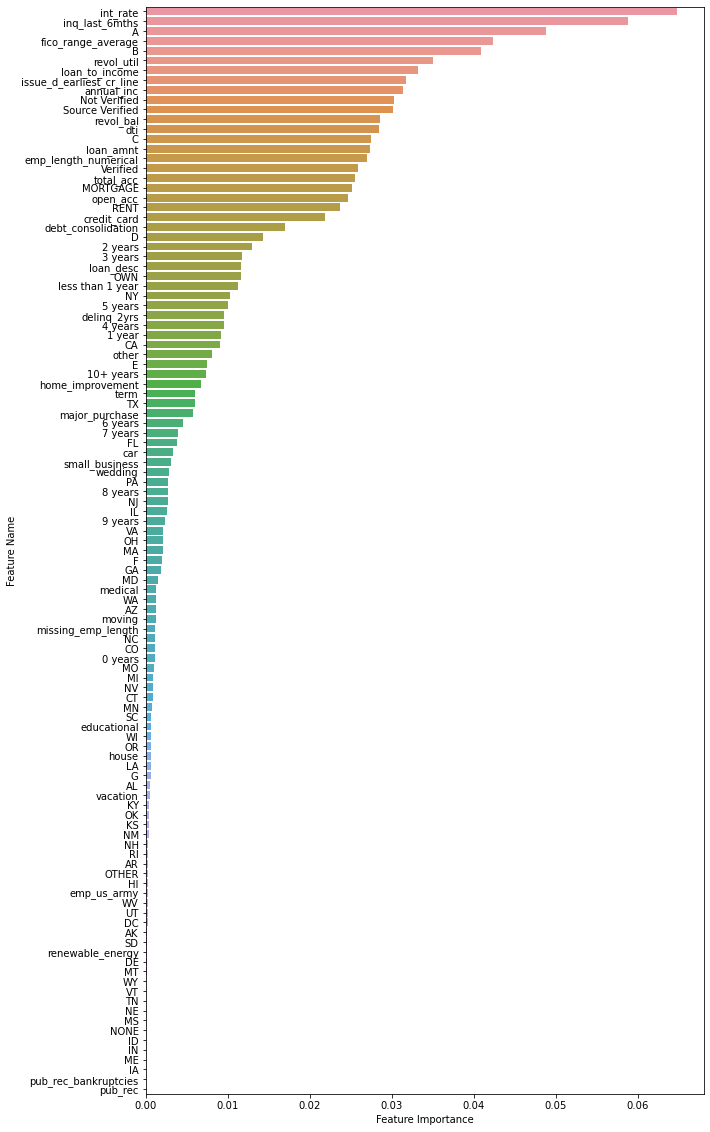

In [51]:
# Plotting feature importance
import seaborn as sns
plt.figure(figsize = (10,20))
sns.barplot(x = importances["Importance"], y = importances["Attribute"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")

In [ ]:
# Looking at the above plot we can see that some features have stronger impact on the model than the others.
# I decided to try to perform Random Forest Classifier only on these features in different configurations and see models' AUROC score. and performance on testing and training data (as below)
# Features I chose are int_rate, inq_last_6mths, fico_range_average, revol_util, loan_to_income, issue_d_earliest_cr_line.
# I did not choose A and B as loan grade is highly correlated witn int_rate feature.
# I also did not choose annual_inc Even though it is important feature this information is included in loan_to_income variable.

In [ ]:
# After checking different configurations I decided to use in the final model features: int_rate, inq_last_6mths.

In [72]:
X3_train_feature_imp = X3_train[["int_rate", "inq_last_6mths"]]
X3_test_feature_imp = X3_test[["int_rate", "inq_last_6mths"]]

In [73]:
# Model's performance is lower using important features only.
rf_feature_imp = RandomForestClassifier(random_state = 1)
rf_feature_imp.fit(X3_train_feature_imp, np.ravel(y3_train))
rf_feature_imp_pred = rf_feature_imp.predict(X3_test_feature_imp)
rf_feature_imp_proba = rf_feature_imp.predict_proba(X3_test_feature_imp)[:, 1]
rf_feature_imp_pr = evaluate(rf_feature_imp_pred, y3_test, rf_feature_imp_proba)
rf_feature_imp_pr

{'AUROC': 0.6252,
 'Confusion Matrix': array([[  24, 1442],
        [  57, 9010]])}

In [74]:
# However overfitting is smaller. 
print('Performance on training data using RF:',rf_feature_imp.score(X3_train_feature_imp,y3_train))
print('Performance on testing data using RF:',rf_feature_imp.score(X3_test_feature_imp,y3_test))

Performance on training data using RF: 0.9207334273624823
Performance on testing data using RF: 0.8576853697901833


In [75]:
# Reducing numer of features leads to lower AUROC score.
# However, it doesn't cause as big overfitting as when using all features.
# I will use only important features selected above for further modelling.
# Now I will check how parameters tuning affects model's performance.

In [ ]:
# Random Forest + RandomizedSearchCV
param_rand = {"bootstrap": [True, False],
              "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              "min_samples_leaf": [1, 2, 4],
              "min_samples_split": [2, 5, 10],
              "n_estimators": [100, 500, 1000, 1500, 2000]}
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), param_distributions = param_rand, n_iter = 100,
                               cv = kf, random_state = 1, n_jobs = -1)
rf_random.fit(X3_train_feature_imp, np.ravel(y3_train))
print(rf_random.best_params_)
rf_random_pred = rf_random.predict(X3_test_feature_imp)
rf_random_proba = rf_random.predict_proba(X3_test_feature_imp)[:, 1]
rf_random_pr = evaluate(rf_random_pred, y3_test, rf_random_proba)
rf_random_pr

In [19]:
print('Performance on training data using RF:',rf_random.score(X3_train_feature_imp,y3_train))
print('Performance on testing data using RF:',rf_random.score(X3_test_feature_imp,y3_test))

Performance on training data using RF: 1.0
Performance on testing data using RF: 0.8595841640558246


In [ ]:
# GridSearchCV could be performed on narrowed down parameters for further improvements.
# Random Forest + RandomizedSearchCV
"""
param_grid = {"bootstrap": [False],
              "max_depth": [10, 20, 30],
              "min_samples_leaf": [1,2],
              "min_samples_split": [1,2,3],
              "n_estimators": [1800, 2000, 2200]}
rf_grid = GridSearchCV(estimator = RandomForestClassifier(random_state = 1), param_grid = param_grid, cv = kf, n_jobs = -1)
rf_grid.fit(X3_train_feature_imp, np.ravel(y3_train))
print(rf_grid.best_params_)
rf_grid_pred = rf_grid.predict(X3_test_feature_imp)
rf_grid_proba = rf_grid.predict_proba(X3_test_feature_imp)[:, 1]
rf_grid_pr = evaluate(rf_grid_pred, y3_test, rf_grid_proba)
rf_grid_pr
"""

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
# Shuffle for learning curves
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 1)

In [ ]:
X3_feature_imp = = X3[["int_rate", "inq_last_6mths"]]

In [ ]:
plot_learning_curve(rf_random, "Learning Curve Random Forest", X3_feature_imp, np.ravel(y3), (0.7, 1.01), cv = cv, n_jobs = -1)
plt.show()